<a href="https://colab.research.google.com/github/KravchenkoDanila/2025_2_PochtiVPraime/blob/main/3/home_task3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание EDA

### Что Требуется сделать
- Продемонстрировать эффективную работу с данными в pandas (данных тут относительно много > 100mb) (взять случайные ~10_000 строк)
- Визуализировать сырые данные (box-plot, scatter plot, etc), подумай какие графики тебе будут полезны, реализуй их (следи за размером, чтобы ноутбук загружался)
- Проанализировать данные, порассуждать над ними, выдвинь гипотезы и подумай как их проверить
- Выполнить все шаги препроцессинга
- Построить модель, обучить модель минимизировать f1-меру (сори мы это еще не проходили( )
- Проанализируй качество своей модели, выполни кроссвалидацию
- Проведи shapley values анализ

----

Описание фичей тут:
- https://archive.ics.uci.edu/dataset/73/mushroom


In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


Описание данных:
class - это таргет метка (e - edible, p - poisoned)

In [ ]:
df.columns

In [ ]:
len(df)

100363

###***ДЗ***

Я слишком долго занимался этим ДЗ.
И я понял что это практически необъятная тема.


На каждом этапе анализа данных можно поступить несколькими способами, это может привести к улудшению или к ухудшению финального результата.

Я сильно прострочил, но я много узнал для себя.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


Базовая проверка сырых данных

In [ ]:
df.shape

(3116945, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [ ]:
print("Количество пропущенных значений:")
print(df.isnull().sum())

Количество пропущенных значений:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


создаем выборку (псевдо)случайных 30к значений

In [ ]:
df_sample = df.sample(n=30000, random_state=24)
print(f"Размер случайной выборки: {df_sample.shape}")

Размер случайной выборки: (30000, 22)


In [ ]:
df_sample.head()


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
948155,948155,p,5.98,x,e,e,f,a,NaN,y,...,NaN,NaN,n,NaN,w,t,z,NaN,d,u
284574,284574,e,9.39,f,e,b,f,NaN,c,b,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
2975571,2975571,e,6.83,x,NaN,g,t,p,NaN,g,...,NaN,y,w,NaN,NaN,f,f,NaN,d,u
231725,231725,e,6.27,x,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,a
344952,344952,e,2.72,x,NaN,b,f,NaN,d,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a


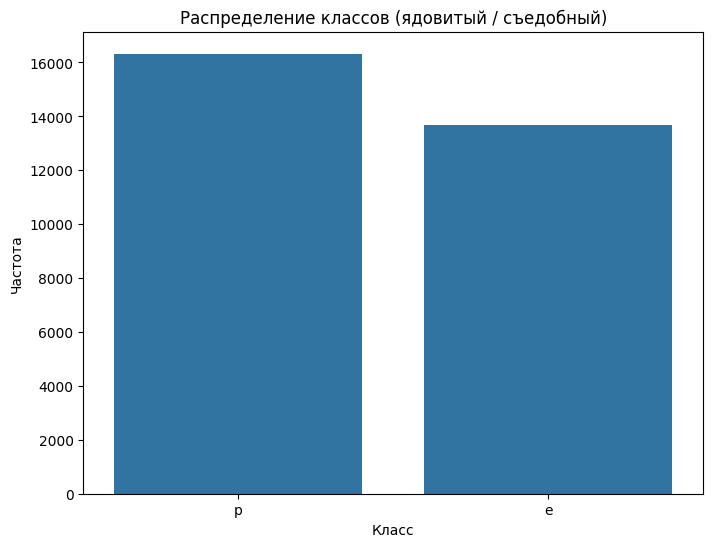

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_sample, x='class')
plt.title('Распределение классов (ядовитый / съедобный)')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.show()

Отлично, распределение достаточно равномерное.

Посмотрим сколько у нас пропущеных значений


In [ ]:
print("Количество пропущенных значений:")
print(df_sample.isnull().sum())

Количество пропущенных значений:
id                          0
class                       0
cap-diameter                0
cap-shape                   0
cap-surface              6363
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          4959
gill-spacing            12084
gill-color                  1
stem-height                 0
stem-width                  0
stem-root               26494
stem-surface            18968
stem-color                  0
veil-type               28510
veil-color              26378
has-ring                    0
ring-type                1258
spore-print-color       27431
habitat                     1
season                      0
dtype: int64


У нас много пустых значений, можно избавиться от NaN значений (заполнить модой или удалить признак, где очень много пропусков).

Можно принять отситствие данных, как данные.
Тоесть создать новй признак n - Nan.

Можно объединить столбцы со смежными значниями.

Так как это учебные проект, попробую как можно больше вариантов обработки данных.


Удалим колонки, где количество данных < 30% (таких колонок не много, так что можем себе позволить(надеюсь....))

In [ ]:
df2 = df_sample[[column for column in df_sample if df_sample[column].count() / len(df_sample) >= 0.3]]
del df2['id']
print("List of dropped columns:", end=" ")
for c in df_sample.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df_sample = df2

List of dropped columns: id, stem-root, veil-type, veil-color, spore-print-color, 



В результате удалилось 4 колонки с признаками, так как осталось 17 признаков, удаление четырёх не критично (возможно).

In [ ]:
print("Количество пропущенных значений:")
print(df_sample.isnull().sum())

Количество пропущенных значений:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface              6363
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          4959
gill-spacing            12084
gill-color                  1
stem-height                 0
stem-width                  0
stem-surface            18968
stem-color                  0
has-ring                    0
ring-type                1258
habitat                     1
season                      0
dtype: int64


Однако у нас остались признаки у которого много Null значений: stem-surface, gill-spacing

Построим график для детального анализа stem-surface

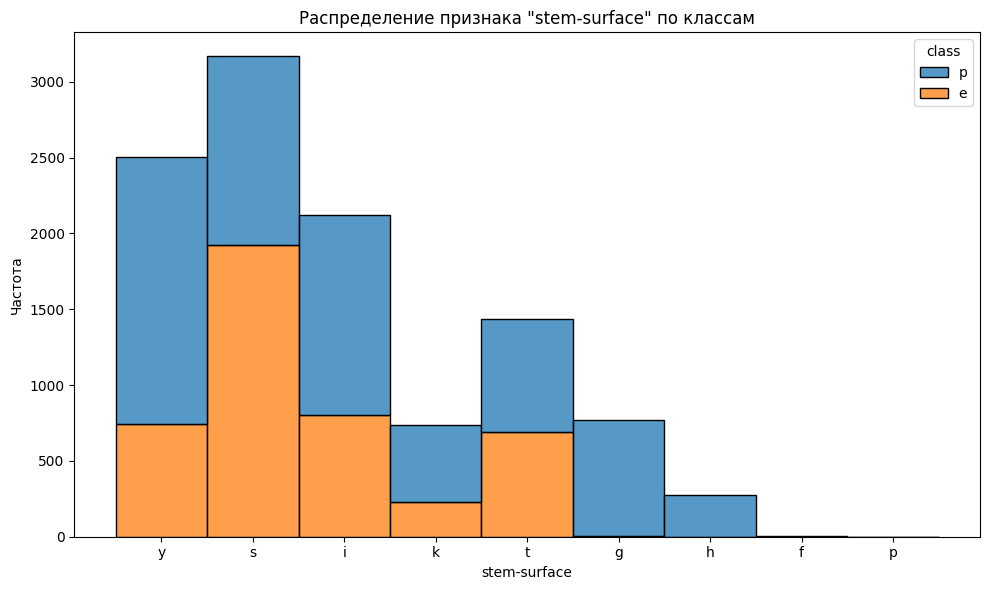

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sample,
             x='stem-surface',
             hue='class',
             multiple='stack')

plt.title('Распределение признака "stem-surface" по классам')
plt.xlabel('stem-surface')
plt.ylabel('Частота')


plt.tight_layout()
plt.show()

Сложно сделать правильный вывод,
в этом параметре слишком много Null значений, однако есть g и h фичи, которые почти всегда указывают на пренадлежностьь гриба к классу p.


Приму решение не учитывать этот признак и удалю его(возможно зря)

Построим график для детального анализа gill-spacing

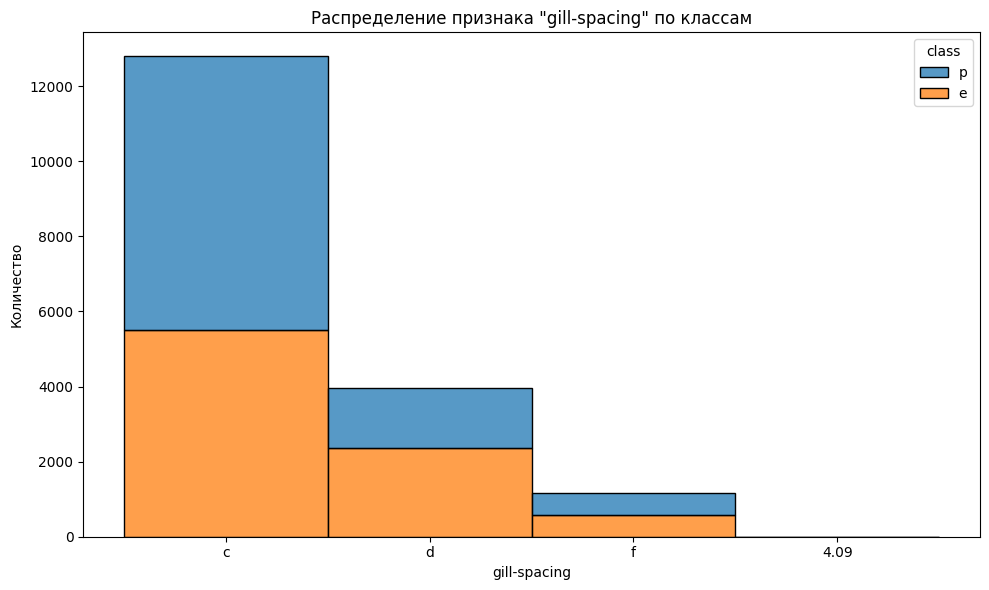

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sample,
             x='gill-spacing',
             hue='class',
             multiple='stack'
            )

plt.title('Распределение признака "gill-spacing" по классам')
plt.xlabel('gill-spacing')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Вот тут практически одназначно можно сказать, что параметр не влияет на класс гриба.

Удалим эти колонки из DF

In [ ]:
df_sample = df_sample.drop(columns=['stem-surface',  'gill-spacing'])


Посмотрим на очтавшиеся пропущенные значения.

In [ ]:
print("Количество пропущенных значений:")
print(df_sample.isnull().sum())

Количество пропущенных значений:
class                      0
cap-diameter               0
cap-shape                  0
cap-surface             6363
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         4959
gill-color                 1
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1258
habitat                    1
season                     0
dtype: int64


5 колонок с пропусками:
habitat и gill-color имеют по 1 пропуску, все просто, заполняем модой.


cap-surface gill-attachment ring-type имеют достаточное количество пропусков для более детального анализа.

Построим для них графики

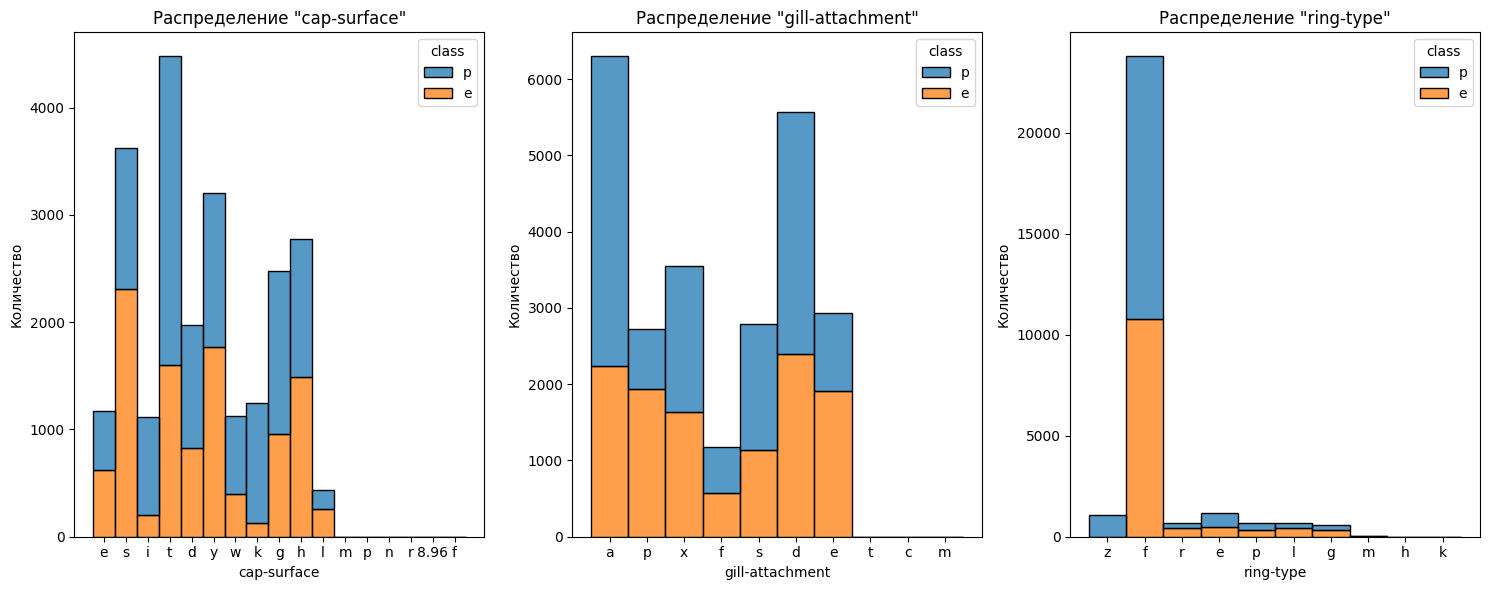

In [ ]:
features_with_missing = [
    'cap-surface',
    'gill-attachment',
    'ring-type'
]

# Создаем подграфики
n_features = len(features_with_missing)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6))
if n_features == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Построение графиков
for i, feature in enumerate(features_with_missing):
    row = i // n_cols
    col = i % n_cols

    # Проверяем, что подграфик существует
    if n_features > 1:
        ax = axes[i]
    else:
        ax = axes[0]

    # Построение стековой гистограммы
    sns.histplot(data=df_sample,
                 x=feature,
                 hue='class',
                 multiple='stack',
                 discrete=True,  # Для лучшего отображения категориальных данных
                 ax=ax)  # Указываем конкретный subplot

    ax.set_title(f'Распределение "{feature}"')
    ax.set_xlabel(feature)
    ax.set_ylabel('Количество')


plt.tight_layout()
plt.show()

**cup-face:** поверхность шляпки, у нас тут достаточно много нулевых значений, и какая то аномалия 8.96.
Думаю что тут надо заменить нулевые и аномальное значения на моду.

**gill-attachment:** это описание юбки гриба, поэтому отсутствие описания - это тоже информация
сделаем для этой колонки one-hot-encoding не удаляя нулевые значения.

**ring-type** нуждается в дополнительном анализе

**gill-color** и **habitat** имеют по одному нулевому значению, заполним их модой, как и говорилось ранне.

Обработка cap-surface:

In [ ]:
# 1. Проверим уникальные значения и их частоту
print("'cap-surface' до обработки:")
print(df_sample['cap-surface'].value_counts(dropna=False)) # Показывает NaN тоже

# 2. Найдем моду (наиболее часто встречающееся значение)
mode_value = df_sample['cap-surface'].mode()
if not mode_value.empty:
    mode_value = mode_value[0] # Берем первое значение моды (если их несколько)
    print(f"\nмода: '{mode_value}'")
else:
    print("\nНе удалось определить моду.")

# 3. Заменяем пропущенные значения на моду
df_sample['cap-surface'] = df_sample['cap-surface'].fillna(mode_value)
print("\nЗаменили пропущенные значения на моду.")

# 4. Заменяем аномальное значение '8.96' на моду (если оно есть)
# Проверим, есть ли такое значение
if '8.96' in df_sample['cap-surface'].values:
    df_sample['cap-surface'] = df_sample['cap-surface'].replace('8.96', mode_value)
else:
    print("Аномальное значение '8.96' не найдено в данных.")

# 5. Проверим результат
print("\n'cap-surface' после обработки:")
print(df_sample['cap-surface'].value_counts(dropna=False))

# Проверим, остались ли пропущенные значения
print(f"\nКоличество пропущенных значений после обработки: {df_sample['cap-surface'].isnull().sum()}")

'cap-surface' до обработки:
cap-surface
NaN     6363
t       4477
s       3623
y       3204
h       2775
g       2481
d       1973
k       1243
e       1176
w       1128
i       1113
l        437
f          2
m          1
p          1
n          1
r          1
8.96       1
Name: count, dtype: int64

мода: 't'

Заменили пропущенные значения на моду.

'cap-surface' после обработки:
cap-surface
t    10841
s     3623
y     3204
h     2775
g     2481
d     1973
k     1243
e     1176
w     1128
i     1113
l      437
f        2
m        1
p        1
n        1
r        1
Name: count, dtype: int64

Количество пропущенных значений после обработки: 0


возможно мы об этом пожалеем...

Обработка **gill-attachment, gill-color и habitat**

In [ ]:
# --- Обработка gill-attachment ---
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.float64)
gill_attachment_array = df_sample['gill-attachment'].values.reshape(-1, 1)
encoded_array = encoder.fit_transform(gill_attachment_array)

try:
    encoded_columns = encoder.get_feature_names_out(['gill_attachment'])
except AttributeError:
    # Для старых версий sklearn
    encoded_columns = encoder.get_feature_names(['gill_attachment'])

encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df_sample.index)
df_sample = pd.concat([df_sample, encoded_df], axis=1)
df_sample = df_sample.drop(columns=['gill-attachment'])


In [ ]:
# --- Обработка gill-color ---
# Заполнение одного пропущенного значения самым популярным значением
mode_gill_color = df_sample['gill-color'].mode()
if not mode_gill_color.empty:
    mode_gill_color = mode_gill_color[0]
    print(f"Мода для gill-color: '{mode_gill_color}'")
    df_sample['gill-color'] = df_sample['gill-color'].fillna(mode_gill_color)
else:
    print("Не удалось определить моду для gill-color")

Мода для gill-color: 'w'


In [ ]:
# --- Обработка habitat ---
# Заполнение одного пропущенного значения самым популярным значением
mode_habitat = df_sample['habitat'].mode()
if not mode_habitat.empty:
    mode_habitat = mode_habitat[0]
    print(f"Мода для habitat: '{mode_habitat}'")
    df_sample['habitat'] = df_sample['habitat'].fillna(mode_habitat)
else:
    print("Не удалось определить моду для habitat")

Мода для habitat: 'd'


In [ ]:
print("Количество пропущенных значений:")
print(df_sample.isnull().sum())

Количество пропущенных значений:
class                      0
cap-diameter               0
cap-shape                  0
cap-surface                0
cap-color                  0
does-bruise-or-bleed       0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1258
habitat                    0
season                     0
gill_attachment_a          0
gill_attachment_c          0
gill_attachment_d          0
gill_attachment_e          0
gill_attachment_f          0
gill_attachment_m          0
gill_attachment_p          0
gill_attachment_s          0
gill_attachment_t          0
gill_attachment_x          0
gill_attachment_nan        0
dtype: int64


Теперь проанализируем кольца, а точнее у нас есть 2 зависимых друг от друга параметра:
**has-ring и ring-type**

In [ ]:
# Проверим связи между этими признаками
print("Распределение 'has-ring':")
print(df_sample['has-ring'].value_counts(dropna=False))

print("\nРаспределение 'ring-type':")
print(df_sample['ring-type'].value_counts(dropna=False))

# print("\nСвязь между 'has-ring' и 'ring-type':")
# # Создадим таблицу сопряженности
# cross_tab = pd.crosstab(df_sample['has-ring'], df_sample['ring-type'], margins=True)
# print(cross_tab)


Распределение 'has-ring':
has-ring
f    22767
t     7233
Name: count, dtype: int64

Распределение 'ring-type':
ring-type
f      23797
NaN     1258
e       1165
z       1098
r        696
l        690
p        682
g        568
m         44
h          1
k          1
Name: count, dtype: int64


Кажется тут снова какая то аномалия: судя по данным параметра has-ring (наличие кольца), из 30к данных у 22767 кольцо отсутствует, однако в параметре ring-type есть параметр f, который принадлежит 23797 грибам, помимо этого есть 1258 NaN параметров.

Предлагаю решить эту аномалию следующим образом:
приоритетным параметром будет has-ring, для всех строк где has-ring = f, выставим значение ring-type - f.

А там где has-ring = t, а ring-type = f или NaN, поставим моду.


In [ ]:
ring_type_counts = df_sample['ring-type'].value_counts(dropna=True)
print(ring_type_counts)

# Найдем моду
mode_ring_type = ring_type_counts.index[1] # Первый элемент после f
print(f"\nМода для ring-type: {mode_ring_type}")

# 1. Для строк, где has-ring = f, устанавливаем ring-type = f
df_sample.loc[df_sample['has-ring'] == 'f', 'ring-type'] = 'f'

# 2. Для строк, где has-ring = t, заполняем ring-type модой, если он равен 'f' или NaN
mask_t_and_f_or_nan = (df_sample['has-ring'] == 't') & ((df_sample['ring-type'] == 'f') | (df_sample['ring-type'].isna()))
df_sample.loc[mask_t_and_f_or_nan, 'ring-type'] = mode_ring_type

# Проверка
print("-------------------------------------------")
print(df_sample['has-ring'].value_counts(dropna=False))
print(df_sample['ring-type'].value_counts(dropna=False))

# print("\nСвязь между 'has-ring' и 'ring-type' после исправления:")
# cross_tab_fixed = pd.crosstab(df_sample['has-ring'], df_sample['ring-type'], margins=True)
# print(cross_tab_fixed)

ring-type
f    23797
e     1165
z     1098
r      696
l      690
p      682
g      568
m       44
h        1
k        1
Name: count, dtype: int64

Мода для ring-type: e
-------------------------------------------
has-ring
f    22767
t     7233
Name: count, dtype: int64
ring-type
f    22767
e     3456
z     1098
r      694
l      690
p      682
g      567
m       44
h        1
k        1
Name: count, dtype: int64


Пофикшено.

Однако мне кажется что можно заполнять пустые и не валидные значения не модой, а одним из всх возможных значений, но не просто рандоомным значением, а так чтобы у ккждого из значения был вес, зависящий от количества параметра в выборке.

Надеюсь я смог донести мысль, возможно как нибудь почитаю об этом.


Почитал, поспрашивал.  Идея странная, но мысли оставлю тут.

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 948155 to 1696730
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 30000 non-null  object 
 1   cap-diameter          30000 non-null  float64
 2   cap-shape             30000 non-null  object 
 3   cap-surface           30000 non-null  object 
 4   cap-color             30000 non-null  object 
 5   does-bruise-or-bleed  30000 non-null  object 
 6   gill-color            30000 non-null  object 
 7   stem-height           30000 non-null  float64
 8   stem-width            30000 non-null  float64
 9   stem-color            30000 non-null  object 
 10  has-ring              30000 non-null  object 
 11  ring-type             30000 non-null  object 
 12  habitat               30000 non-null  object 
 13  season                30000 non-null  object 
 14  gill_attachment_a     30000 non-null  float64
 15  gill_attachment_c

Ну вот теперь у нас все данные валидны. Можно и оптимизировать их хранение в памяти.


In [ ]:
df_mem_before = df_sample.memory_usage(deep=True).sum()

# --- Оптимизация памяти ---
# Список категориальных признаков
categorical_columns = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-color',
    'has-ring',
    'ring-type',
    'habitat',
    'season'
]

# Преобразование категориальных признаков в тип 'category'
for col in categorical_columns:
    if col in df_sample.columns:
        original_memory = df_sample[col].memory_usage(deep=True)
        df_sample[col] = df_sample[col].astype('category')
        new_memory = df_sample[col].memory_usage(deep=True)
        print(f"Столбец '{col}': было {original_memory} байт, стало {new_memory} байт")

df_mem_after = df_sample.memory_usage(deep=True).sum()

print("\nОбщее использование памяти до оптимизации:")
print(df_mem_before)

print("\nОбщее использование памяти после оптимизации:")
print(df_mem_after)

print(f"\nРазница: {df_mem_before - df_mem_after}")

Столбец 'class': было 1740000 байт, стало 270208 байт
Столбец 'cap-shape': было 1740003 байт, стало 271259 байт
Столбец 'cap-surface': было 1740000 байт, стало 271356 байт
Столбец 'cap-color': было 1740005 байт, стало 271411 байт
Столбец 'does-bruise-or-bleed': было 1740000 байт, стало 270372 байт
Столбец 'gill-color': было 1740000 байт, стало 270900 байт
Столбец 'stem-color': было 1740000 байт, стало 271306 байт
Столбец 'has-ring': было 1740000 байт, стало 270208 байт
Столбец 'ring-type': было 1740000 байт, стало 270800 байт
Столбец 'habitat': было 1740000 байт, стало 271206 байт
Столбец 'season': было 1740000 байт, стало 270372 байт

Общее использование памяти до оптимизации:
20100008

Общее использование памяти после оптимизации:
3939398

Разница: 16160610


Неплохо так оптимизировалось.

поглядим на числовые признаки

In [ ]:
num_cols = ['cap-diameter' , 'stem-height', 'stem-width']

In [ ]:
target_col = 'class'

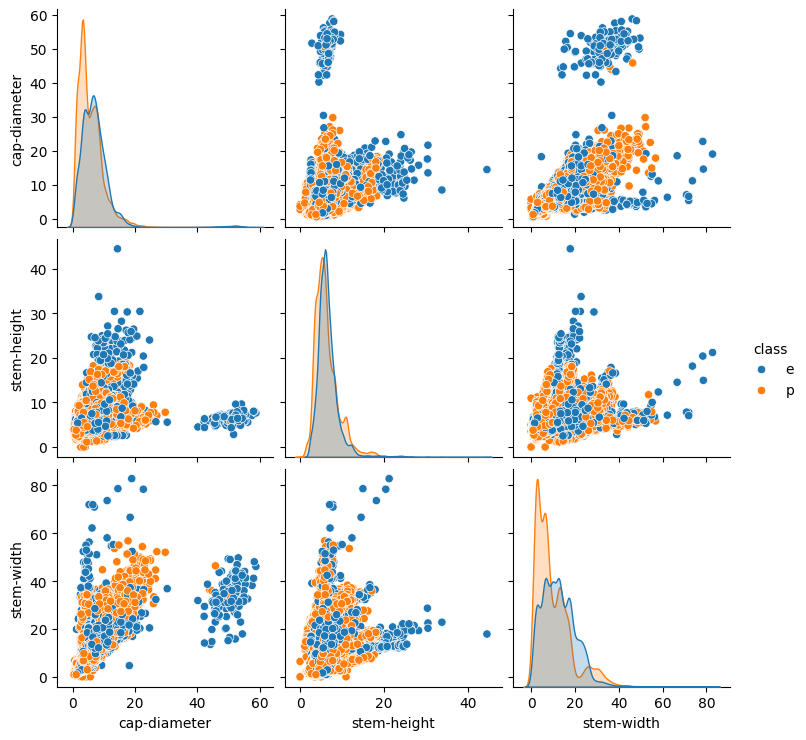

In [ ]:
sns.pairplot(df_sample[num_cols + [target_col]], hue=target_col)

По верхнему среднедму и по верхнему правому граифку видим, что есть небольшой кластер, где хорошо от остальных отделён e класс. Видимо это очень важные признаки для обучения.

Можно еще попробовать построить матрицу корреляций:

In [ ]:
num_df = df[num_cols + [target_col]].copy()

<Axes: >

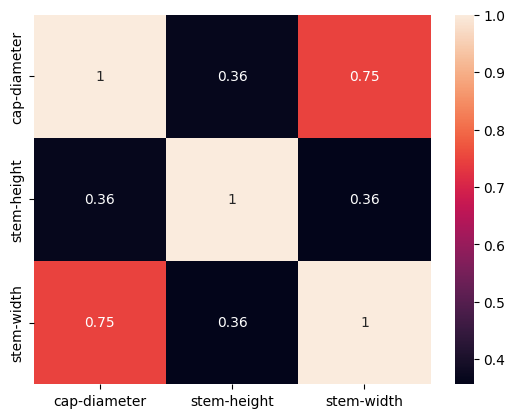

In [ ]:
sns.heatmap(num_df[num_cols].corr(), annot=True)

Два из трех признаков довольно сильно между собой коррелируют, диаметр шляпки сильнее чем высота ножки зависит от ширины ножжки.

интересно

Построим гистограммы.

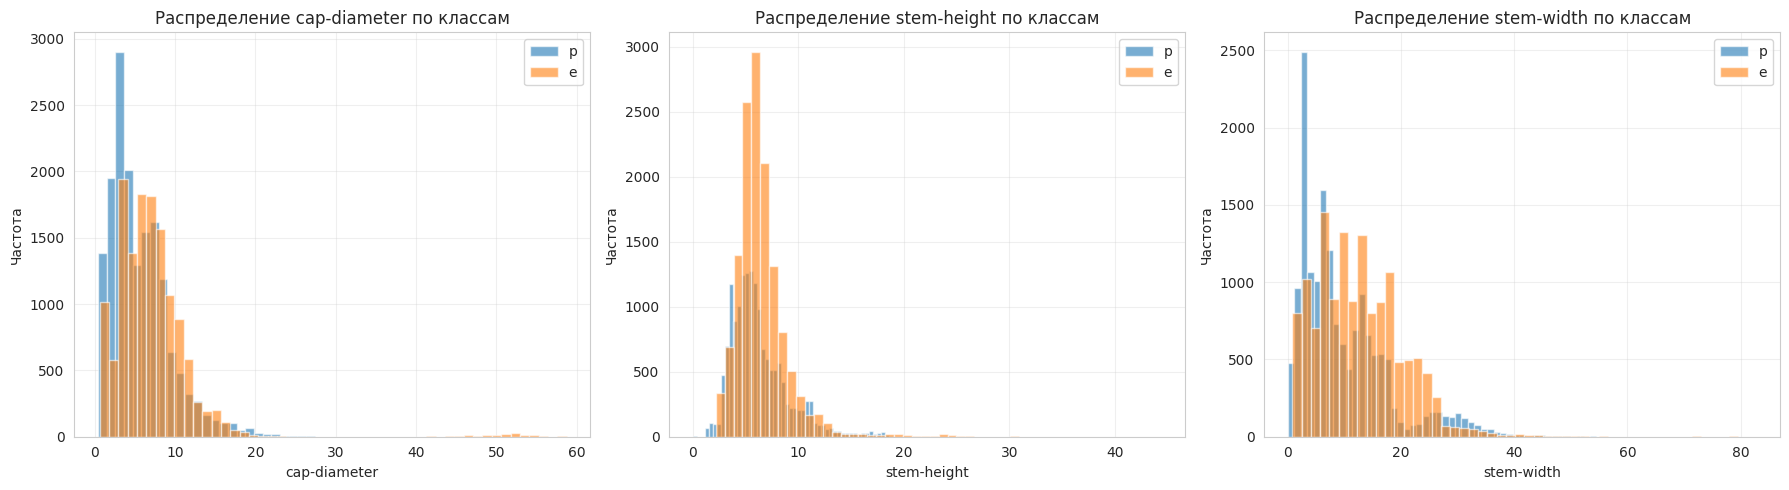

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


for i, feature in enumerate(num_cols):
    for class_val in df_sample['class'].unique():
        data_class = df_sample[df_sample['class'] == class_val][feature]
        axes[i].hist(data_class, bins=50, alpha=0.6, label=class_val)

    axes[i].set_title(f'Распределение {feature} по классам')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Центрируем числовые фичи

In [ ]:
df_sample['stem-width'] = np.log1p(df_sample['stem-width'])
df_sample['stem-height'] = np.log1p(df_sample['stem-height'])
df_sample['cap-diameter'] = np.log1p(df_sample['cap-diameter'])

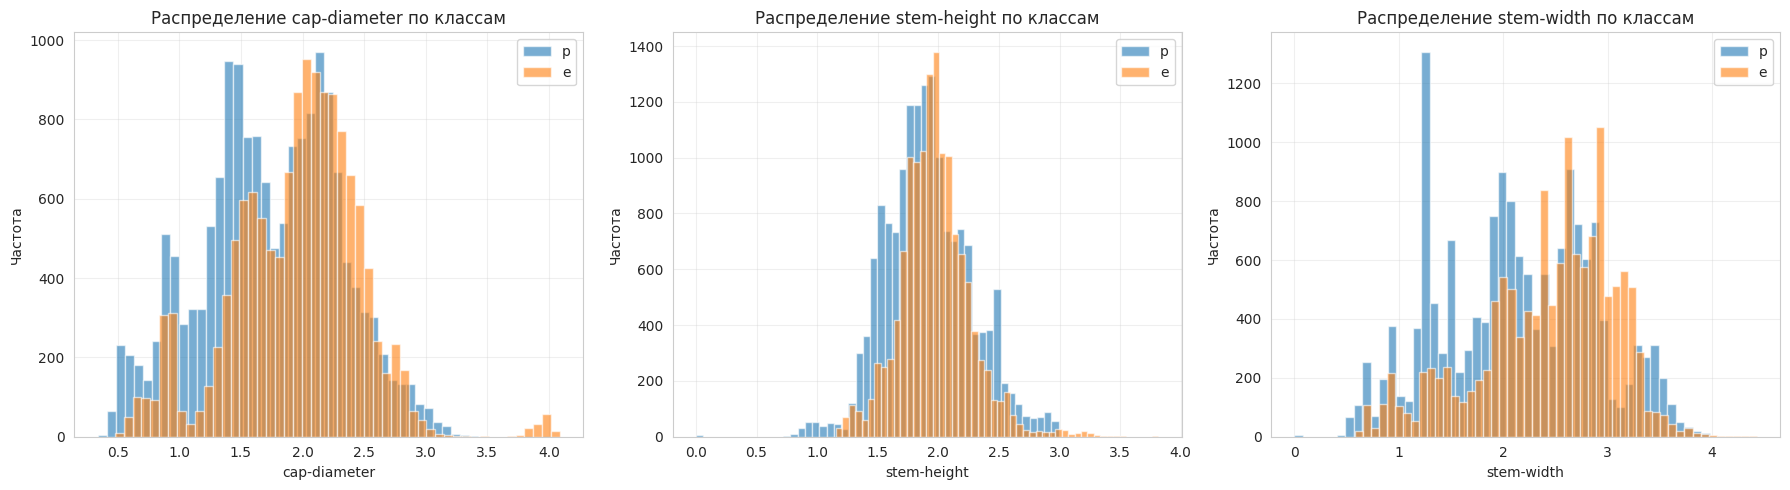

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


for i, feature in enumerate(num_cols):
    for class_val in df_sample['class'].unique():
        data_class = df_sample[df_sample['class'] == class_val][feature]
        axes[i].hist(data_class, bins=50, alpha=0.6, label=class_val)

    axes[i].set_title(f'Распределение {feature} по классам')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В cap-diameter как будто бы есть выброс в районе 4, но это только 1 класс.

Пожалуй оставлю эти данные, возможно они влияют на результат.
Хотя это же диаметр шляпки, такие данные не могут иметь пропуска , и должны меняться постепенно и безпропусков....

Посмотрим на общую картину категориальных признаков

In [ ]:
categorical_columns = [
    'cap-shape',
    'cap-surface',
    'cap-color',
    'does-bruise-or-bleed',
    'gill-color',
    'stem-color',
    'has-ring',
    'ring-type',
    'habitat',
    'season'
]

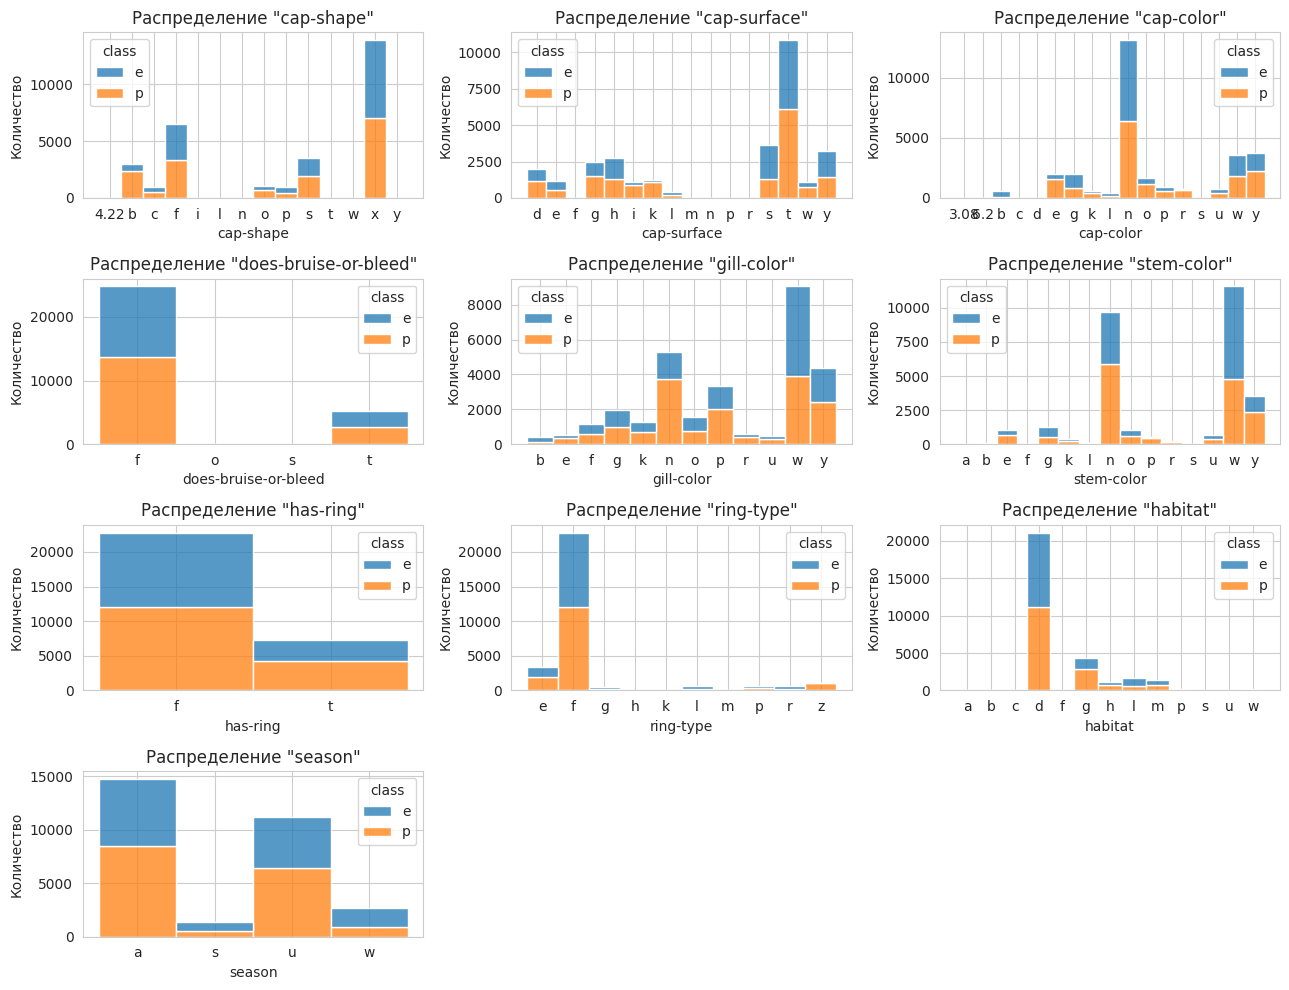

In [ ]:
n_features = len(categorical_columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 10))
if n_features == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()


for i, feature in enumerate(categorical_columns):
    row = i // n_cols
    col = i % n_cols

    if n_features > 1:
        ax = axes[i]
    else:
        ax = axes[0]
    sns.histplot(data=df_sample,
                 x=feature,
                 hue='class',
                 multiple='stack',
                 discrete=True,
                 ax=ax)

    ax.set_title(f'Распределение "{feature}"')
    ax.set_xlabel(feature)
    ax.set_ylabel('Количество')
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Снова какие то мусорные числовые значения, от них нужно избавиться.
Не знаю как от них правильно избавиться, можно заменить на моду, это врооде как база для таких случаев. Однако если в одной колонке мусорное значение(поврежденные данные), возможно остальные значения этого объекта тоже повреждены, и лучше этот объект удалить. сложно....

Ещё появилдось желание не учитывать значения, у которых столбцы почти не видны.
возможно это тоже мусор.

Наверняка это узнать нее получилось, потому что описание дата фрейма не соответствует нашему файлу (но так даже интереснее)

Заменю мусор на моду.

In [ ]:
# Проверим, какие столбцы содержат числовые строки
print("Проверка категориальных признаков на числовые строки:")
for col in categorical_columns:
    if col in df_sample.columns:
        unique_vals = df_sample[col].unique()
        # Проверим, есть ли строки, которые выглядят как числа
        numeric_strings = [val for val in unique_vals if isinstance(val, str) and val.replace('.', '', 1).replace('-', '', 1).isdigit()]
        if numeric_strings:
            print(f"{col}: найдены числовые строки: {numeric_strings}")

# Создаем копию данных
df_cleaned = df_sample.copy()

# Для каждого категориального признака
for col in categorical_columns:
    if col in df_cleaned.columns:
        # Сначала проверим, есть ли в нем числовые строки
        unique_vals = df_cleaned[col].unique()
        numeric_strings = [val for val in unique_vals if isinstance(val, str) and val.replace('.', '', 1).replace('-', '', 1).isdigit()]

        if numeric_strings:
            print(f"\nВ столбце '{col}' найдены числовые строки: {numeric_strings}")

            # Заменяем числовые строки на моду (наиболее часто встречающееся значение)
            # Сначала находим моду
            mode_val = df_cleaned[col].mode()
            if not mode_val.empty:
                mode_value = mode_val[0]
                print(f"Мода для '{col}': '{mode_value}'")

                # Заменяем числовые строки на моду
                df_cleaned[col] = df_cleaned[col].apply(lambda x: mode_value if isinstance(x, str) and x.replace('.', '', 1).replace('-', '', 1).isdigit() else x)
                print(f"Числовые строки в '{col}' заменены на моду: '{mode_value}'")
            else:
                print(f"Невозможно найти моду для '{col}'")
        else:
            print(f"\nВ столбце '{col}' нет числовых строк")

print("\nПосле очистки:")
for col in categorical_columns:
    if col in df_cleaned.columns:
        unique_vals = df_cleaned[col].unique()
        print(f"{col}: {len(unique_vals)} уникальных значений - {sorted(unique_vals)[:10]}{'...' if len(unique_vals) > 10 else ''}")

df_sample = df_cleaned

Проверка категориальных признаков на числовые строки:
cap-shape: найдены числовые строки: ['4.22']
cap-color: найдены числовые строки: ['3.08', '6.2']

В столбце 'cap-shape' найдены числовые строки: ['4.22']
Мода для 'cap-shape': 'x'
Числовые строки в 'cap-shape' заменены на моду: 'x'

В столбце 'cap-surface' нет числовых строк

В столбце 'cap-color' найдены числовые строки: ['3.08', '6.2']
Мода для 'cap-color': 'n'
Числовые строки в 'cap-color' заменены на моду: 'n'

В столбце 'does-bruise-or-bleed' нет числовых строк

В столбце 'gill-color' нет числовых строк

В столбце 'stem-color' нет числовых строк

В столбце 'has-ring' нет числовых строк

В столбце 'ring-type' нет числовых строк

В столбце 'habitat' нет числовых строк

В столбце 'season' нет числовых строк

После очистки:
cap-shape: 13 уникальных значений - ['b', 'c', 'f', 'i', 'l', 'n', 'o', 'p', 's', 't']...
cap-surface: 16 уникальных значений - ['d', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n']...
cap-color: 15 уникальных знач

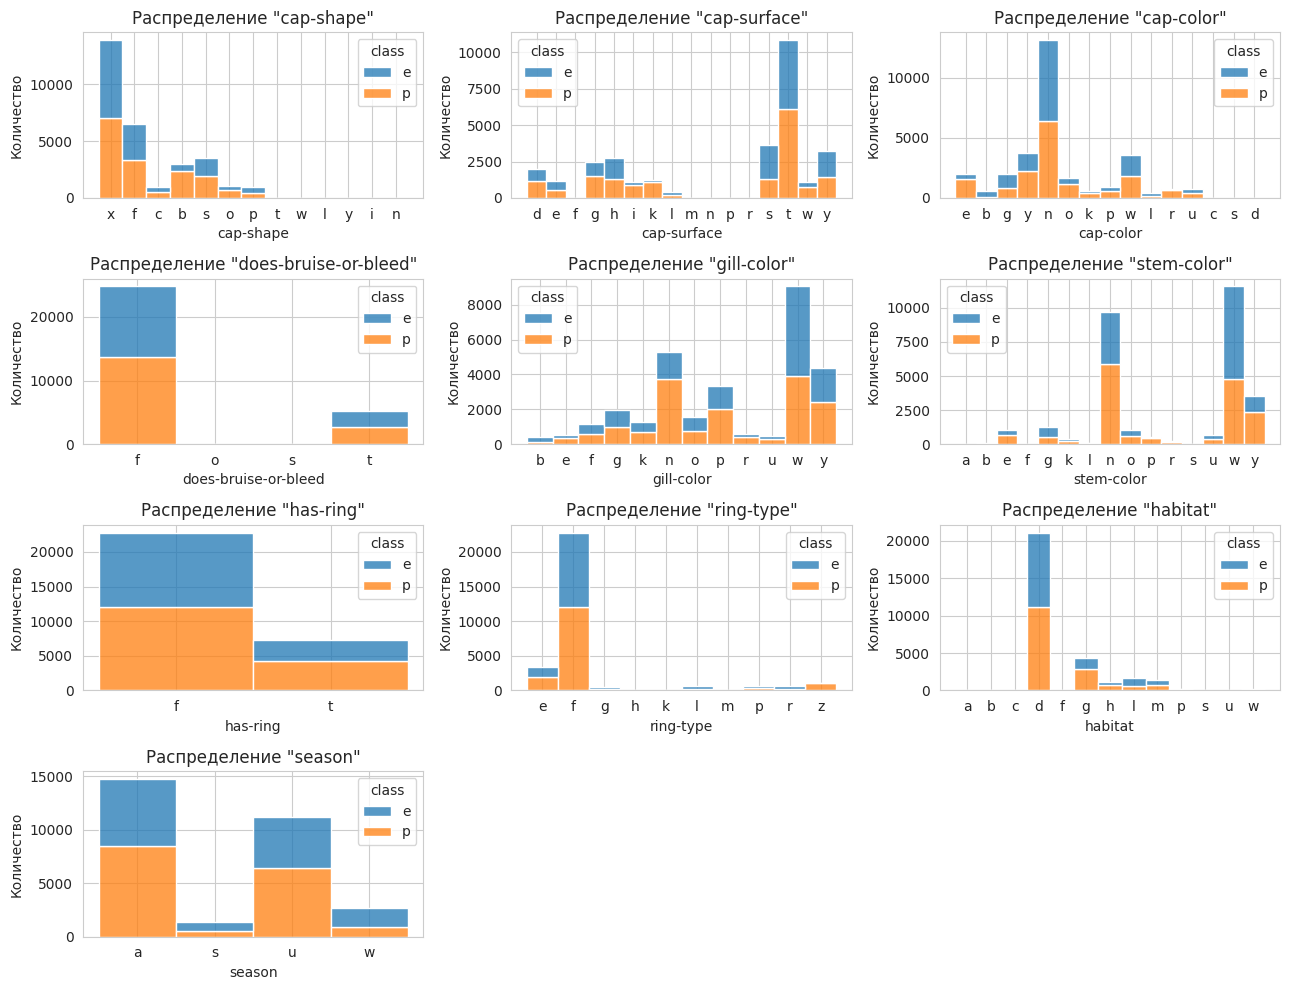

In [ ]:
n_features = len(categorical_columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 10))
if n_features == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()


for i, feature in enumerate(categorical_columns):
    row = i // n_cols
    col = i % n_cols

    if n_features > 1:
        ax = axes[i]
    else:
        ax = axes[0]
    sns.histplot(data=df_sample,
                 x=feature,
                 hue='class',
                 multiple='stack',
                 discrete=True,
                 ax=ax)

    ax.set_title(f'Распределение "{feature}"')
    ax.set_xlabel(feature)
    ax.set_ylabel('Количество')
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

мусор почищен

ура

Ну какого то гениального фича инженеринга не приходит в голову, поэтому можно начать пробовать обучать модельки и смотреть результаты.

In [ ]:
df_final = df_sample.copy()

Преобразуем категориальные признаки в числовые для обучения модели

In [ ]:
le_class = LabelEncoder()
df_final['class_encoded'] = le_class.fit_transform(df_final['class'])

# Для остальных категориальных признаков создадим dummy variables
df_final_encoded = pd.get_dummies(df_final, columns=categorical_columns, prefix=categorical_columns)

numeric_features = df_final_encoded.select_dtypes(include=[np.number]).columns
print(f"\nЧисловые признаки для моделирования: {len(numeric_features)}, {numeric_features}")


Числовые признаки для моделирования: 15, Index(['cap-diameter', 'stem-height', 'stem-width', 'gill_attachment_a',
       'gill_attachment_c', 'gill_attachment_d', 'gill_attachment_e',
       'gill_attachment_f', 'gill_attachment_m', 'gill_attachment_p',
       'gill_attachment_s', 'gill_attachment_t', 'gill_attachment_x',
       'gill_attachment_nan', 'class_encoded'],
      dtype='object')


Разделение на train и test 80/20

In [ ]:
X = df_final_encoded.drop(['class', 'class_encoded'], axis=1)
y = df_final_encoded['class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y, cv=kfold):
    """Evaluate model using cross-validation"""
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores.mean(), scores.std()

# Модели для сравнения
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Ridge': Ridge(alpha=10, random_state=42),
    'Lasso': Lasso(alpha=0.001, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Сравнение моделей
results = {}
print("Model Comparison (Cross-Validation Accuracy):")
print("-" * 45)

for name, model in models.items():
    try:
        mean_accuracy, std_accuracy = evaluate_model(model, X_train, y_train)
        results[name] = mean_accuracy
        print(f"{name:<20}: {mean_accuracy:.4f} (+/- {std_accuracy*2:.4f})")
    except Exception as e:
        print(f"{name:<20}: Ошибка - {str(e)}")

# Найдем лучшую модель
if results:
    best_model_name = max(results, key=results.get)
    print(f"\nЛучшая модель: {best_model_name} с точностью: {results[best_model_name]:.4f}")
else:
    print("\nНе удалось оценить ни одну модель")

Model Comparison (Cross-Validation Accuracy):
---------------------------------------------
Logistic Regression : 0.7792 (+/- 0.0115)
Ridge               : nan (+/- nan)
Lasso               : nan (+/- nan)
ElasticNet          : nan (+/- nan)
Random Forest       : 0.9843 (+/- 0.0017)
Gradient Boosting   : 0.8698 (+/- 0.0136)

Лучшая модель: Random Forest с точностью: 0.9843


Вместо scoring='accuracy' в cross_val_score можно использовать  scoring='f1_macro'. Это позволит оценить модели по F1

In [ ]:
def evaluate_model_f1(model, X, y, cv=kfold):
    """Оценка модели с использованием F1-меры."""
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro') # Используем F1
    return scores.mean(), scores.std()

# Сравнение моделей по F1
results_f1 = {}
print("Model Comparison (Cross-Validation F1 Macro):")
print("-" * 45)

for name, model in models.items():
    try:
        mean_f1, std_f1 = evaluate_model_f1(model, X_train, y_train)
        results_f1[name] = mean_f1
        print(f"{name:<20}: {mean_f1:.4f} (+/- {std_f1*2:.4f})")
    except Exception as e:
        print(f"{name:<20}: Ошибка - {str(e)}")

# Найдем лучшую модель по F1
if results_f1:
    best_model_name_f1 = max(results_f1, key=results_f1.get)
    print(f"\nЛучшая модель по F1: {best_model_name_f1} с F1: {results_f1[best_model_name_f1]:.4f}")
else:
    print("\nНе удалось оценить ни одну модель по F1.")

Model Comparison (Cross-Validation F1 Macro):
---------------------------------------------
Logistic Regression : 0.7776 (+/- 0.0114)
Ridge               : nan (+/- nan)
Lasso               : nan (+/- nan)
ElasticNet          : nan (+/- nan)
Random Forest       : 0.9842 (+/- 0.0017)
Gradient Boosting   : 0.8680 (+/- 0.0137)

Лучшая модель по F1: Random Forest с F1: 0.9842


Ну мало что поменялось.


Используем Random Forest как лучшую модель по предыдущему анализу

In [ ]:
best_model = RandomForestClassifier(n_estimators=50, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

Предсказания

In [ ]:
y_pred = best_model.predict(X_test)

print("\n--- Качество модели на тестовой выборке ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro')) # F1 макро
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Качество модели на тестовой выборке ---
Accuracy: 0.9863333333333333
F1 Score: 0.9862594396532464

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2766
           1       0.99      0.98      0.99      3234

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



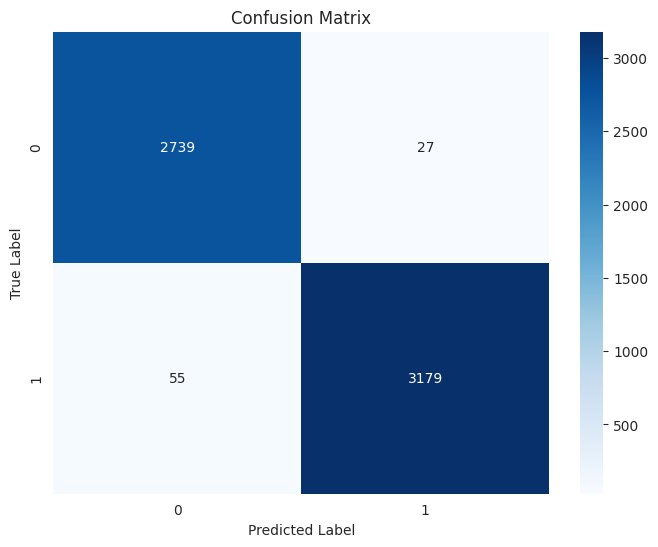

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

shapley values анализ

In [ ]:
import shap
rf_shap = RandomForestClassifier(n_estimators=50, random_state=42)
rf_shap.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf_shap, feature_perturbation="tree_path_dependent")

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values_class1 = shap_values[:, :, 1]

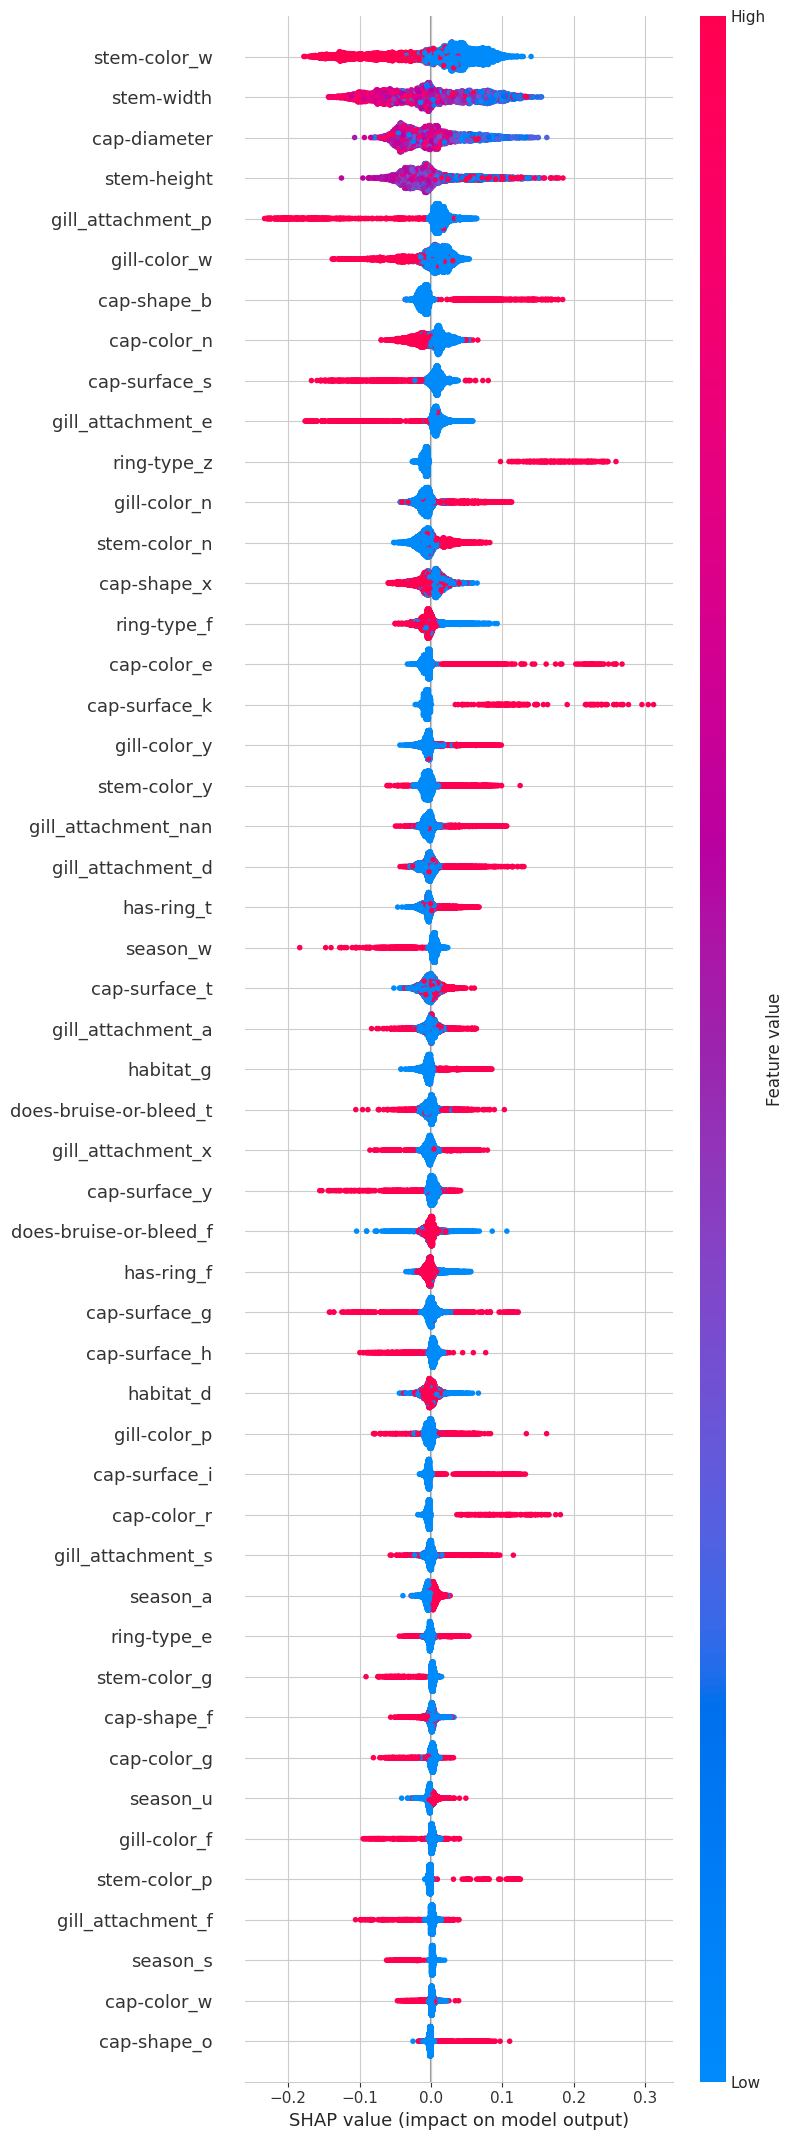

In [ ]:
shap.summary_plot(shap_values_class1, X_test, feature_names=X_test.columns, max_display=50)

Судя по всему, параметры стебля и то что под шляпкой у гриба Gill

на всякий случай, а то долго грузилось, прикрепляю фото граика

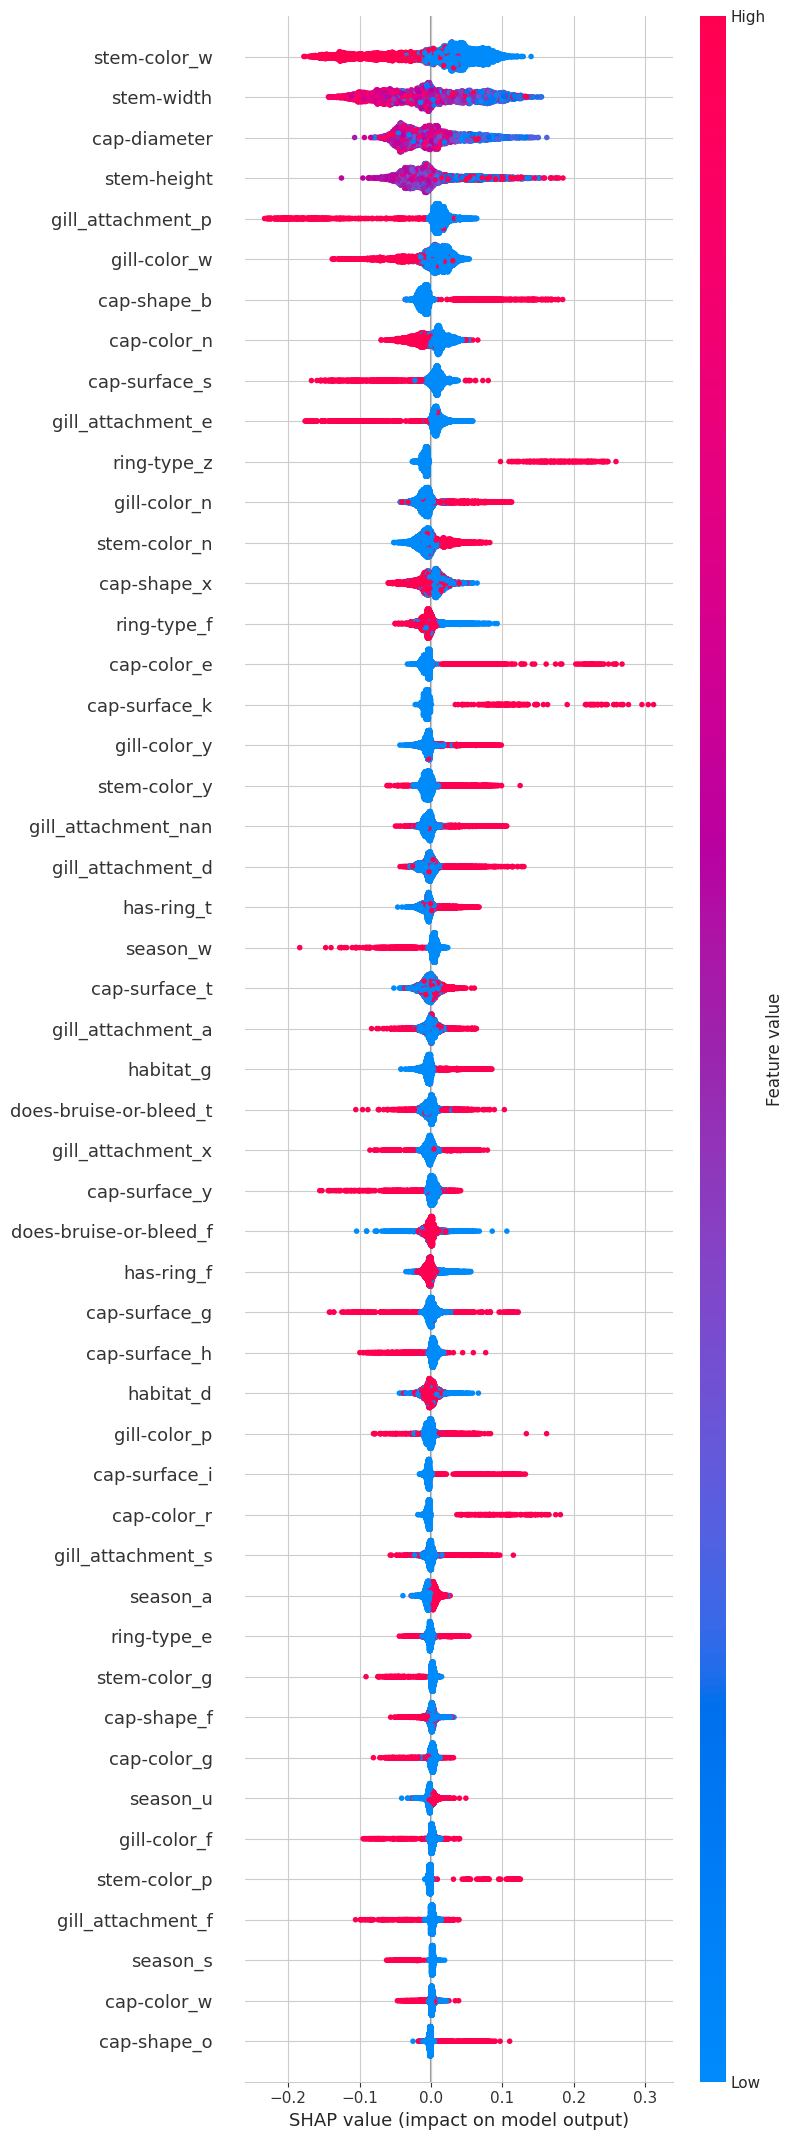